In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [28]:
df = pd.read_csv('diabetes.csv')

#Discover the Data


In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df.shape

(768, 9)

In [12]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [29]:
df['Outcome'].value_counts(normalize=True) * 100


,proportion
Outcome,
0,65.104167
1,34.895833


/tmp/ipython-input-210333678.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df, palette="Set2")


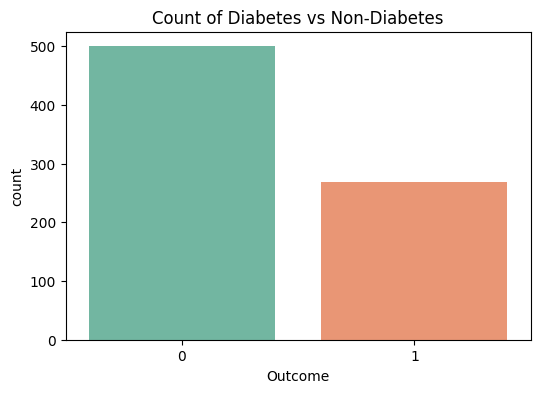

In [30]:
plt.figure(figsize=(6,4))
sns.countplot(x='Outcome', data=df, palette="Set2")
plt.title("Count of Diabetes vs Non-Diabetes")
plt.show()

/tmp/ipython-input-1261412786.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='Glucose', data=df, palette="Set3")


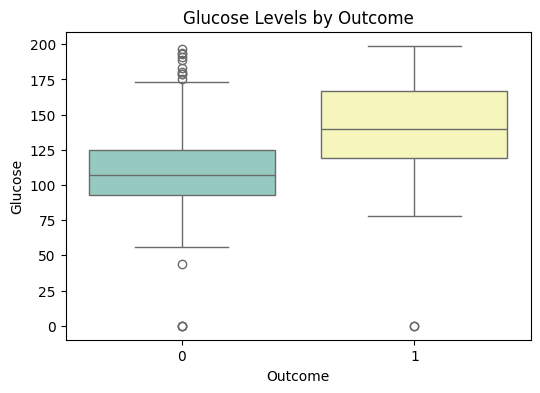

In [31]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Outcome', y='Glucose', data=df, palette="Set3")
plt.title("Glucose Levels by Outcome")
plt.show()

/tmp/ipython-input-1590117592.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='BMI', data=df, palette="Set1")


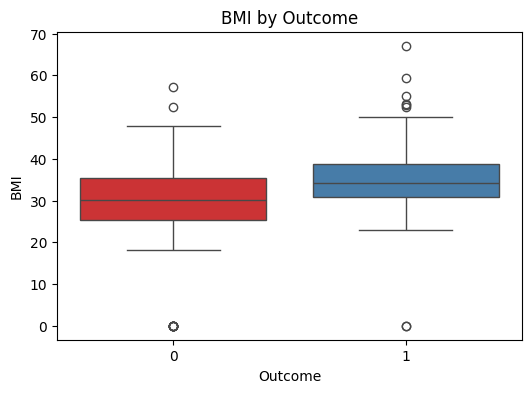

In [32]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Outcome', y='BMI', data=df, palette="Set1")
plt.title("BMI by Outcome")
plt.show()

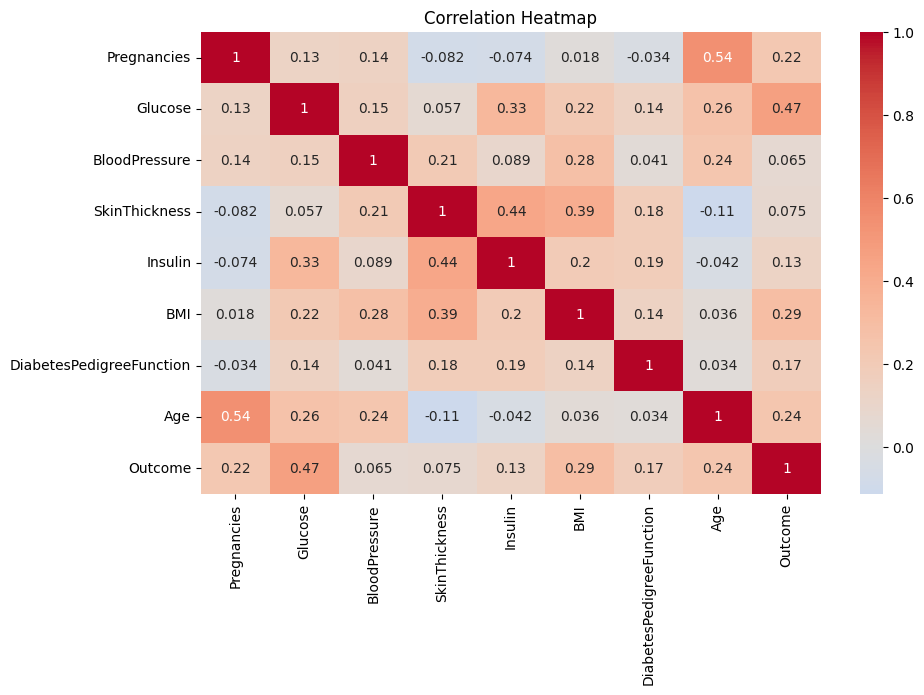

In [33]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

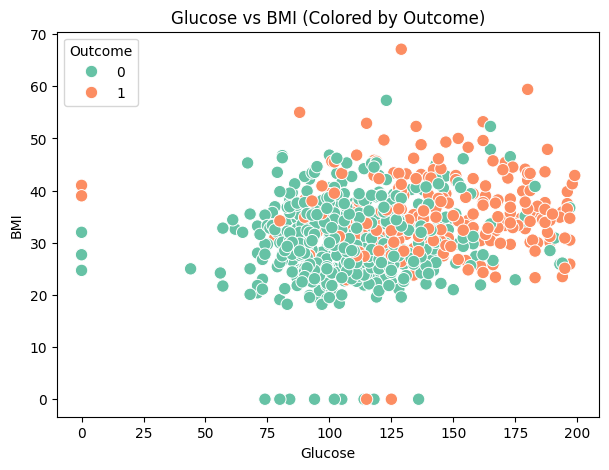

In [34]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='Glucose', y='BMI', hue='Outcome', data=df, palette="Set2", s=80)
plt.title("Glucose vs BMI (Colored by Outcome)")
plt.show()

#Prepare the Data


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('Outcome', axis=1)
y = df['Outcome']


In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (614, 8)
Test shape: (154, 8)


In [44]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeature means after scaling (approx 0):")
print(X_train_scaled.mean(axis=0))

print("\nFeature std dev after scaling (approx 1):")
print(X_train_scaled.std(axis=0))


Feature means after scaling (approx 0):
[-6.94341436e-17  1.73585359e-16 -2.09748975e-16 -3.47170718e-17
 -1.59119912e-17  1.35975198e-16 -1.09937394e-16 -1.08490849e-16]

Feature std dev after scaling (approx 1):
[1. 1. 1. 1. 1. 1. 1. 1.]


#Models


In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [48]:
log_reg = LogisticRegression(max_iter=1000 ,class_weight='balanced')

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']

}

grid_lr = GridSearchCV(log_reg, param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train_scaled, y_train)

print("Best Logistic Regression params:", grid_lr.best_params_)
print("Best Logistic Regression score (CV):", grid_lr.best_score_)

Best Logistic Regression params: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Logistic Regression score (CV): 0.7508463281354125


In [52]:
y_pred_lr = grid_lr.predict(X_test_scaled)

print("\n--- Logistic Regression (class_weight) ---")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))



--- Logistic Regression (class_weight) ---
Accuracy: 0.7402597402597403
              precision    recall  f1-score   support

           0       0.84      0.74      0.79       100
           1       0.61      0.74      0.67        54

    accuracy                           0.74       154
   macro avg       0.72      0.74      0.73       154
weighted avg       0.76      0.74      0.74       154

Confusion Matrix:
 [[74 26]
 [14 40]]


In [61]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "max_features": ["sqrt", "log2"],
    "class_weight": [None, "balanced"]
}


grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring="f1",
    n_jobs=-1,
    verbose=2
)


grid_search.fit(X_train_scaled, y_train)

best_rf = grid_search.best_estimator_

print("✅ Best Parameters:", grid_search.best_params_)
print("Best CV Score (F1):", grid_search.best_score_)

Fitting 3 folds for each of 144 candidates, totalling 432 fits
✅ Best Parameters: {'class_weight': 'balanced', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best CV Score (F1): 0.6746438746438747


In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

y_pred = best_rf.predict(X_test_scaled)

print("\n📊 Random Forest Classifier with GridSearchCV (Faster)")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


📊 Random Forest Classifier with GridSearchCV (Faster)
Accuracy: 0.7597402597402597
Precision: 0.6545454545454545
Recall: 0.6666666666666666
F1 Score: 0.6605504587155964

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.81       100
           1       0.65      0.67      0.66        54

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



In [68]:
from sklearn.svm import SVC
svm = SVC(probability=True, random_state=42)

param_grid = {
    "C": [0.1, 1, 10, 50, 100],
    "kernel": ["rbf", "linear"],
    "gamma": ["scale", "auto", 0.01, 0.001],
    "class_weight": ["balanced"]
}

grid_search_svm = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    cv=5,
    scoring="f1",
    n_jobs=-1,
    verbose=2
)

grid_search_svm.fit(X_train_scaled, y_train)

best_svm = grid_search_svm.best_estimator_

print("✅ Best Parameters:", grid_search_svm.best_params_)
print("Best CV Score (F1):", grid_search_svm.best_score_)


Fitting 5 folds for each of 40 candidates, totalling 200 fits
✅ Best Parameters: {'C': 1, 'class_weight': 'balanced', 'gamma': 'auto', 'kernel': 'rbf'}
Best CV Score (F1): 0.6868691507610796


In [69]:
y_pred = best_svm.predict(X_test_scaled)


print("\n📊 Support Vector Machine with GridSearchCV")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


📊 Support Vector Machine with GridSearchCV
Accuracy: 0.7012987012987013
Precision: 0.5526315789473685
Recall: 0.7777777777777778
F1 Score: 0.6461538461538462

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.66      0.74       100
           1       0.55      0.78      0.65        54

    accuracy                           0.70       154
   macro avg       0.70      0.72      0.69       154
weighted avg       0.74      0.70      0.71       154

